# Ridge Regrasyon
* başk bir doğrusal regresyon modelidir.
* Amaç hata kareler toplımını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır.
* $SSE = \Sigma{ (y_i-\hat{y}_i)^2}$ 
* $SSE_{L_2} = \Sigma{ (y_i-\hat{y}_i)^2} + \lambda \Sigma{ \beta_j^2} $ 
* $\lambda$ ayar paramtresi
* $\Sigma{ \beta_j^2}$ : Ceza terimi
----------------------------
#### Ridge regresyon ; 
* Aşırı öğrenmeye karşı dirençlidir.
* Yanlıdır fakat varyansı düşüktür.(bazen yanlı modelleri daha çok tercih ederiz.)
* Çok fazla paremetre olduğunda EKK'ya göre daha iyidir.(EKK = Klasik regresyon)
* Çok boyutluluk lanetine karşı çözüm sunar. (değişken sayısının gözlem sayısından daha fazla olması, çok boyutluluk laneti).
* Çoklu doğrusal bağlantı problemi olduğunda etkildir.(bağımsız değişkenler arasında yüksek korelasyon gözlenmesi)
* Tüm değişkenler ile model kurar. ilgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.
* $ \lambda$ kritik roldedir. İki terimin(formülde ki) göreceli etkilerini kontrol etmeyi sağlar.
* $\lambda$ için iyi bir değer bulunması önemlidir. Bunun için CrossValidation yöntemi kullanılır.
----------------------
* $SSE_{L_2} = \Sigma{ (y_i-\hat{y}_i)^2} + \lambda \Sigma{ \beta_j^2} $ 
* $\lambda$ ayar paramtresi(kullanıcı tarafından verilmesi ve optimize edilmesi gerekir.)
* $\beta$ ' lar veri setinden elde edilecek olan parametlerdir.
* $\lambda$ ' nın sıfır olduğu yer EKK(klasik regresyondur)'dır. HKT(hata kareler toplamını (SSE'nin türkçesi))' yi minumum yapan $\lambda$'yı arıyoruz.
* $\lambda$ için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır.
* En küçük Cross validationu veren $\lambda$ ayar parametresi olarak seçilir.
* Son olarak seçilen bu $\lambda$ ile model y eniden tüm gözlemlere fit edilir.

## Ridge Regresyon Model


In [7]:
###Gereklii Kütüphaneler
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from  sklearn.linear_model import RidgeCV

In [69]:
df = pd.read_csv('Hitters.csv')

In [70]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [71]:
df = df.dropna()

In [72]:
dms = pd.get_dummies(df[['League','Division','NewLeague']]) # kategorik değişkenlerin bize vereceği bilgiyi daha iyi alabimlek adına one-hot encoding yaklaşımı yapmış oluyoruz

In [73]:
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [74]:
y= df[['Salary']] ## bağımlı değişkenimiz

In [75]:
X_ = df.drop(['Salary','League', 'Division','NewLeague'],axis=1).astype('float64')

In [76]:
X = pd.concat([X_ , dms[['League_N','Division_W', 'NewLeague_N']]], axis=1)

In [77]:
X.shape

(263, 19)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=42)

In [79]:
df.shape

(263, 20)

In [82]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [96]:
ridge_model= Ridge(alpha=5).fit(X_train,y_train)

In [99]:
ridge_model.coef_

array([[ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
         -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
         -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
         -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
         76.19519054, -90.15523668, -16.00453535]])

In [100]:
ridge_model.intercept_

array([-3.42519687])

In [117]:
 lambdas = 10**np.linspace(10,-2,100)*0.5

In [118]:
 np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [119]:
lambdas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [113]:
ridge_model = Ridge()
katsayilar = []

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

In [121]:
katsayilar = np.array(katsayilar)

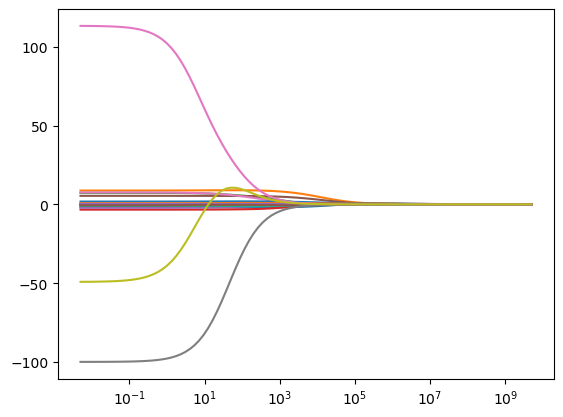

In [127]:
ax = plt.gca()
ax.plot(lambdas, katsayilar.reshape(100,19))
ax.set_xscale("log")

### Ridge regresyon Tahmin

In [131]:
ridge_model = Ridge().fit(X_train, y_train)

In [134]:
y_pred = ridge_model.predict(X_train)

In [133]:
y_pred[0:10]

array([[ 376.25245449],
       [ 803.38498121],
       [ 496.17669652],
       [ 112.69554648],
       [ 427.60020221],
       [1003.6309402 ],
       [ 153.45713944],
       [ 361.33880956],
       [ 483.29143665],
       [ 916.91439669]])

In [135]:
## train hatası (ilkel)
RMSE =np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

289.34470696006565

In [138]:
from sklearn.model_selection import cross_val_score
-cross_val_score(ridge_model, X_train,y_train, cv= 10, scoring='neg_mean_squared_error')

array([254472.04580573,  60833.45970379, 154767.02339013,  85062.49424023,
        69816.89068641, 129298.84224708, 111727.92225975,  85814.81291499,
        58347.4474604 , 224630.58012368])

In [141]:
## daha doğru hata, daha çok hata ama ilkel değil, daha isabetli bir hata
## train hatası
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train,y_train, cv= 10, scoring='neg_mean_squared_error')))

351.393158560637

In [143]:
##test hatası (ilkel)
y_pred = ridge_model.predict(X_test)
RMSE =np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.8082905730227

# Model Tuning
* Neden model tuning?

In [151]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

360.281459053577

In [167]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,629.0,168.0,18.0,73.0,102.0,40.0,18.0,8424.0,2464.0,164.0,1008.0,1072.0,402.0,1067.0,157.0,14.0,0,0,0
236,237.0,52.0,0.0,15.0,25.0,30.0,24.0,14053.0,4256.0,160.0,2165.0,1314.0,1566.0,523.0,43.0,6.0,1,1,1
93,511.0,138.0,25.0,76.0,96.0,61.0,3.0,592.0,164.0,28.0,87.0,110.0,71.0,157.0,7.0,8.0,0,1,0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,211.0,56.0,13.0,0,0,0


In [154]:
lambdas_1 = np.random.randint(0,1000,100)

In [187]:
lambdas_2= 10**np.linspace(10,-2,100)*0.5
import numpy as np
from sklearn.preprocessing import normalize
norm1 = lambdas_2 /np.linalg.norm(lambdas_2)
lambdas_2 = normalize(lambdas_2 [:,np.newaxis], axis=0).ravel()

In [188]:
lambdas_2

array([6.54036111e-01, 4.94754333e-01, 3.74263509e-01, 2.83116619e-01,
       2.14167340e-01, 1.62009739e-01, 1.22554426e-01, 9.27079289e-02,
       7.01301483e-02, 5.30508854e-02, 4.01310493e-02, 3.03576671e-02,
       2.29644619e-02, 1.73717732e-02, 1.31411094e-02, 9.94076733e-03,
       7.51982593e-03, 5.68847255e-03, 4.30312087e-03, 3.25515313e-03,
       2.46240397e-03, 1.86271830e-03, 1.40907809e-03, 1.06591590e-03,
       8.06326287e-04, 6.09956266e-04, 4.61409546e-04, 3.49039401e-04,
       2.64035507e-04, 1.99733178e-04, 1.51090824e-04, 1.14294668e-04,
       8.64597247e-05, 6.54036111e-05, 4.94754333e-05, 3.74263509e-05,
       2.83116619e-05, 2.14167340e-05, 1.62009739e-05, 1.22554426e-05,
       9.27079289e-06, 7.01301483e-06, 5.30508854e-06, 4.01310493e-06,
       3.03576671e-06, 2.29644619e-06, 1.73717732e-06, 1.31411094e-06,
       9.94076733e-07, 7.51982593e-07, 5.68847255e-07, 4.30312087e-07,
       3.25515313e-07, 2.46240397e-07, 1.86271830e-07, 1.40907809e-07,
      

In [189]:
ridgecv = RidgeCV(alphas= lambdas_2, scoring='neg_mean_squared_error', cv =10)
ridgecv.fit(X_train,y_train)## ridge cross-val

RidgeCV(alphas=array([6.54036111e-01, 4.94754333e-01, 3.74263509e-01, 2.83116619e-01,
       2.14167340e-01, 1.62009739e-01, 1.22554426e-01, 9.27079289e-02,
       7.01301483e-02, 5.30508854e-02, 4.01310493e-02, 3.03576671e-02,
       2.29644619e-02, 1.73717732e-02, 1.31411094e-02, 9.94076733e-03,
       7.51982593e-03, 5.68847255e-03, 4.30312087e-03, 3.25515313e-03,
       2.46240397e-03, 1.86271830e-0...
       4.01310493e-10, 3.03576671e-10, 2.29644619e-10, 1.73717732e-10,
       1.31411094e-10, 9.94076733e-11, 7.51982593e-11, 5.68847255e-11,
       4.30312087e-11, 3.25515313e-11, 2.46240397e-11, 1.86271830e-11,
       1.40907809e-11, 1.06591590e-11, 8.06326287e-12, 6.09956266e-12,
       4.61409546e-12, 3.49039401e-12, 2.64035507e-12, 1.99733178e-12,
       1.51090824e-12, 1.14294668e-12, 8.64597247e-13, 6.54036111e-13]),
        cv=10, scoring='neg_mean_squared_error')

In [191]:
ridgecv.alpha_  ## optimum parametre değeri

0.6540361106735454

In [192]:
# final modeli
ridge_tuned = Ridge(ridgecv.alpha_).fit(X_train,y_train)

In [193]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.881947452576

In [210]:
lambdas_1 = np.random.randint(0,1000,100)
import numpy as np
from sklearn.preprocessing import normalize
norm1 = lambdas_1 /np.linalg.norm(lambdas_1)
lambdas_1 = normalize(lambdas_1 [:,np.newaxis], axis=0).ravel()

----------------------

In [211]:
ridgecv = RidgeCV(alphas= lambdas_1, scoring='neg_mean_squared_error', cv =10)
ridgecv.fit(X_train,y_train)## ridge cross-val

RidgeCV(alphas=array([0.0523123 , 0.00499032, 0.0831146 , 0.01256183, 0.03699718,
       0.16037848, 0.11701435, 0.12148842, 0.0505915 , 0.06470205,
       0.11254027, 0.16209928, 0.10376419, 0.16037848, 0.00154872,
       0.1208001 , 0.08173796, 0.00137664, 0.06986445, 0.07244565,
       0.12269298, 0.10668955, 0.06040005, 0.01806839, 0.01497095,
       0.02890943, 0.0805334 , 0.14265425, 0.09722515, 0.07175733,
       0.1...
       0.12200466, 0.09602059, 0.01686383, 0.1627876 , 0.11494939,
       0.13439442, 0.08603996, 0.15366737, 0.16244344, 0.03080231,
       0.15160241, 0.13852434, 0.06194877, 0.04078294, 0.05919549,
       0.10496875, 0.07915676, 0.16588504, 0.05833509, 0.15280697,
       0.01841255, 0.04474078, 0.0437083 , 0.13164114, 0.03286726,
       0.08345876, 0.03200686, 0.14609585, 0.16812208, 0.02976983]),
        cv=10, scoring='neg_mean_squared_error')

In [212]:
ridgecv.alpha_

0.1691545606502015

In [213]:
ridge_tuned = Ridge(ridgecv.alpha_).fit(X_train,y_train)

In [214]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

357.0043449096543